CODSOFT INTERNSHIP TASK 2

NAME: SRISHTI SINGHAL

DOMAIN: DATA SCIENCE

BATCH: JULY 2024

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
from scipy import stats

In [ ]:
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving IMDb Movies India.csv.zip to IMDb Movies India.csv (1).zip


EXTRACTING DATA

In [ ]:
import io
with zipfile.ZipFile(io.BytesIO(uploaded['IMDb Movies India.csv (1).zip']), 'r') as z:
    # Assuming the CSV file inside the zip is named 'IMDb Movies India.csv'
    with z.open('IMDb Movies India.csv') as f:
        data = pd.read_csv(f, encoding='ISO-8859-1')  # or try 'latin1'

# Display the first 10 rows
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


DESCRIBING SHAPE

In [ ]:
data.shape

(15509, 10)

In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.dropna(inplace=True)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


DATA CLEANING

In [ ]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

REMOVING NaN VALUES

In [ ]:
data= data.dropna(subset=["Year","Genre","Director","Actor 1","Actor 2","Actor 3","Rating"])

In [ ]:
data = data.dropna().reset_index(drop=True)

In [ ]:
data.shape

(5659, 10)

In [ ]:
data.dropna(subset=data.columns[1:9],how='all',inplace=True)
data.dropna(subset=['Name','Year'],how='all',inplace=True)
data.drop_duplicates(['Name','Year'],keep='first',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5657 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5657 non-null   object 
 1   Year      5657 non-null   object 
 2   Duration  5657 non-null   object 
 3   Genre     5657 non-null   object 
 4   Rating    5657 non-null   float64
 5   Votes     5657 non-null   object 
 6   Director  5657 non-null   object 
 7   Actor 1   5657 non-null   object 
 8   Actor 2   5657 non-null   object 
 9   Actor 3   5657 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.1+ KB


REMOVING DUPLICATE DATA

In [ ]:
data.duplicated(subset=["Name","Year"]).sum()

0

In [ ]:
data=data.drop_duplicates(keep="first",subset=["Name","Year"]).reset_index(drop=True)


In [ ]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

UNIVARIATE ANALYSIS

In [ ]:
iplot(px.violin(data_frame=data,x="Rating"))

In [ ]:
iplot(px.violin(data_frame=data,x="Duration"))

In [ ]:
iplot(px.violin(data_frame=data,x="Votes"))

Rating and duration are pretty much normally distributed
Votes are right skewed and has alot of outliers but we cannot remove them

DISTRIBUTION OF MOVIES ACROSSS GENRES.

In [ ]:
data.Genre.value_counts().reset_index()

,Genre,count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",328
3,"Action, Drama",206
4,"Comedy, Drama",205
...,...,...
371,"Comedy, Crime, Musical",1
372,"History, Romance",1
373,"Drama, History, Sport",1
374,"Animation, Comedy, Drama",1


# EDA

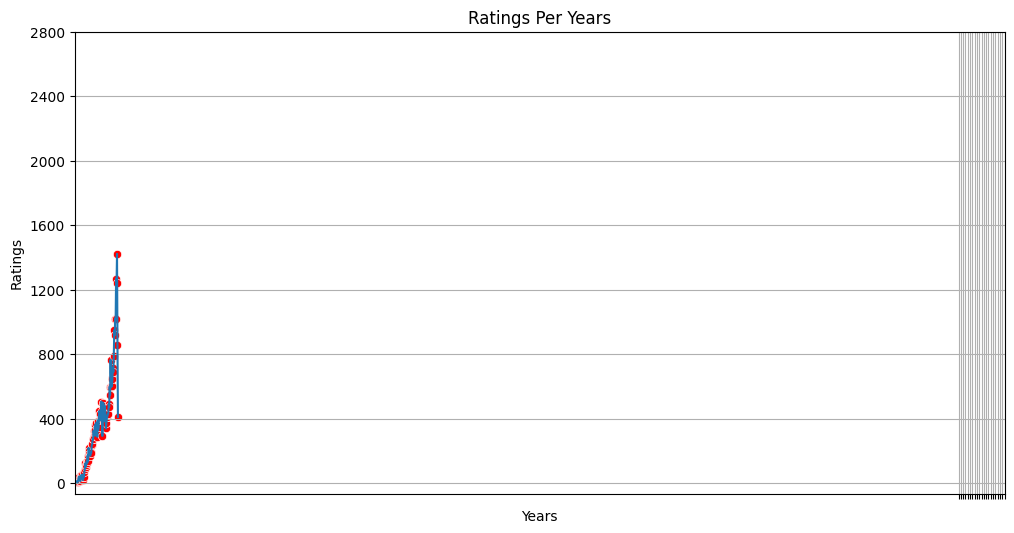

In [ ]:
#Year with best rating
rating_sum=data.groupby('Year')['Rating'].sum().reset_index()

plt.figure(figsize=(12,6))
sb.lineplot(x='Year',y='Rating',data=rating_sum)
sb.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.yticks(np.arange(0,3000,400))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Ratings')
plt.xlabel('Years')
plt.title('Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

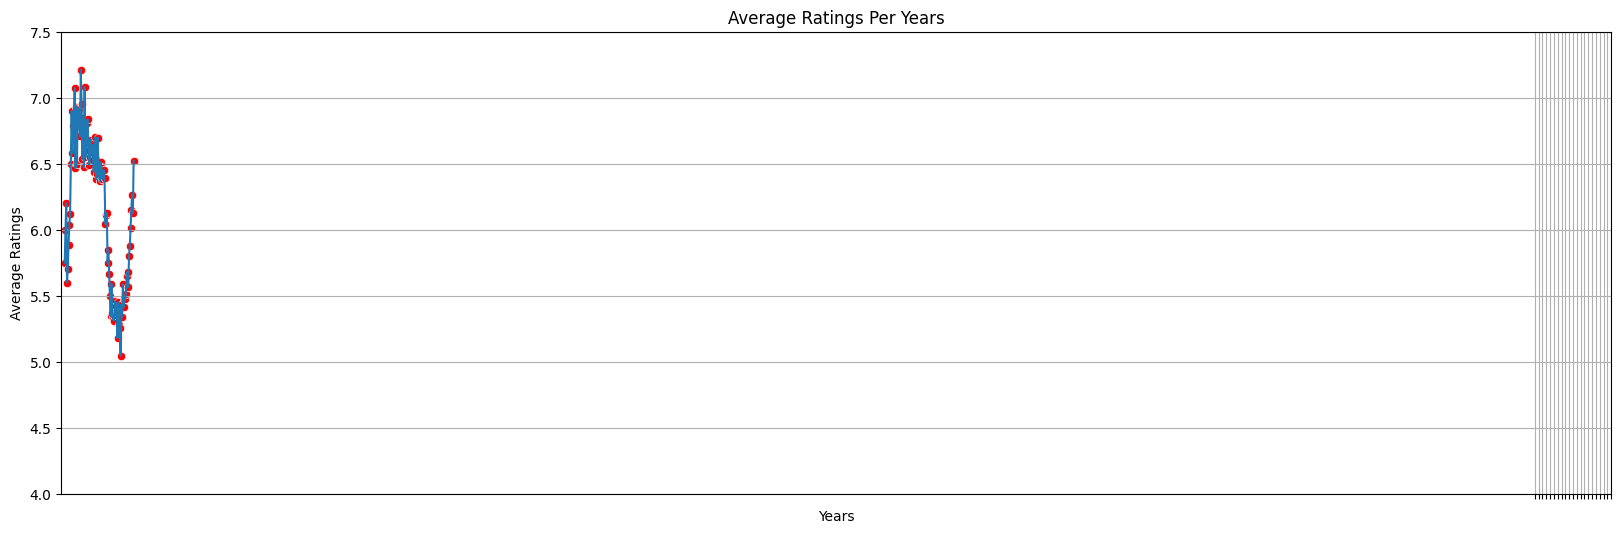

In [ ]:
#Year with best average rating
rating_avg=data.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(20,6))
sb.lineplot(x='Year',y='Rating',data=rating_avg)
sb.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.yticks(np.arange(4,8,0.5))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Ratings')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<ipython-input-41-aa88739ce719>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




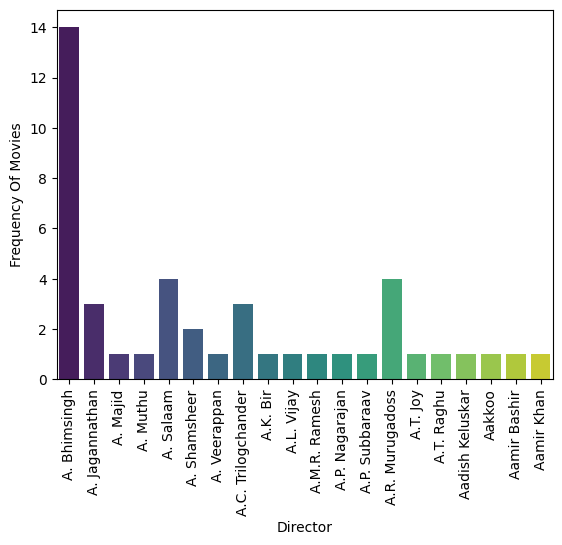

In [ ]:
#Top 20 Directors by Frequency of Movies
top_20=data.groupby('Director')['Name'].count()[0:20]

sb.barplot(x=top_20.index,y=top_20.values,palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Frequency Of Movies')
plt.xlabel('Director')
plt.show()


In [ ]:
#Top 10 movies according to rating per year and overall.
overall=data.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies Overall:")
overall

Top 10 Movies Overall:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
1,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
3,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
4,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
6,Baikunth,(2021),72 min,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
7,God of gods,(2019),90 min,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8,Love Sorries,(2021),101 min,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
9,Refl3ct,(2021),65 min,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar
